# Zomato API - II

## API Project Details


In [ ]:
# In this section, you need to try to find out answer to the given questions using the solutions you have done in Part 1 or you might need to write code to find the answers.
# Find out the answer, justify them using proper plots and numbers and place them all in a pdf file and upload.
# Find out answer for each question, put your answer along with the proper explanation and plots in a pdf file. Make a zip file of your pdf file and .ipynb file which is having code, and upload that.
# Your report will be evaluated manually and score will be awarded accordingly.

## Zomato Dataset Details


In [ ]:
# Dataset Collection -
# Due to Zomato API Basic Plan restriction, we cannot collect enough data for analysis. To overcome this problem ‘Zomato.csv’ file is provided to analyse the data deeply and to get useful inference.
# Data has been collected from the Zomato API in the form of .json files(raw data) using the following url and stored in CSV file -
# https://developers.zomato.com/api/v2.1/search?entity_id=1&entity_type=city&start=1&count=20 
# Download Link


# Details of zomato.csv -


# Restaurant Id : Unique id of every restaurant across various cities of the world
# Restaurant Name : Name of the restaurant
# Country Code : Country in which restaurant is located
# City : City in which restaurant is located
# Address : Address of the restaurant
# Locality : Location in the city
# Locality Verbose : Detailed description of the locality
# Longitude : Longitude coordinate of the restaurant's location
# Latitude : Latitude coordinate of the restaurant's location
# Cuisines : Cuisines offered by the restaurant
# Average Cost for two : Cost for two people in different currencies
# Currency : Currency of the country
# Has Table booking : yes/no
# Has Online delivery : yes/ no
# Is delivering : yes/ no
# Switch to order menu : yes/no
# Price range : range of price of food
# Aggregate Rating : Average rating out of 5
# Rating color : depending upon the average rating color
# Rating text : text on the basis of rating of rating
# Votes : Number of ratings casted by people


# Country Codes :
 

# Country Code

# Country

# 1

# India

# 14

# Australia

# 30

# Brazil

# 37

# Canada

# 94

# Indonesia

# 148

# New Zealand

# 162

# Phillipines

# 166

# Qatar

# 184

# Singapore

# 189

# South Africa

# 191

# Sri Lanka

# 208

# Turkey

# 214

# UAE

# 215

# United Kingdom

# 216

# United States



In [ ]:
# 1. The dataset is highly skewed toward the cities included in Delhi-NCR. So, we will summarise all the other cities in Rest of India while those in New Delhi, Ghaziabad, Noida, Gurgaon, Faridabad to Delhi-NCR. Doing this would make our analysis turn toward Delhi-NCR v Rest of India.
# 1.1 Plot the bar graph of number of restaurants present in Delhi NCR vs Rest of India.
# 1.2 Find the cuisines which are not present in restaurant of Delhi NCR but present in rest of India.Check using Zomato API whether this cuisines are actually not served in restaurants of Delhi-NCR or just it due to incomplete dataset.
# 1.3 Find the top 10 cuisines served by maximum number of restaurants in Delhi NCR and rest of India.
# 1.4 Write a short detailed analysis of how cuisine served is different from Delhi NCR to Rest of India. Plot the suitable graph to explain your inference.
# 2. User Rating of a restaurant plays a crucial role in selecting a restaurant or ordering the food from the restaurant.
# 2.1 Write a short detail analysis of how the rating is affected by restaurant due following features: Plot a suitable graph to explain your inference.
# 2.1.1 Number of Votes given Restaurant
# 2.1.2 Restaurant serving more number of cuisines.
# 2.1.3 Average Cost of Restaurant
# 2.1.4 Restaurant serving some specific cuisines.
# 2.2 Find the weighted restaurant rating of each locality and find out the top 10 localities with more weighted restaurant rating?
# 2.2.3 Weighted Restaurant Rating=Σ (number of votes * rating) / Σ (number of votes) .
# 3. Visualization
# 3.1 Plot the bar graph top 15 restaurants have a maximum number of outlets.
# 3.2 Plot the histogram of aggregate rating of restaurant( drop the unrated restaurant).
# 3.3 Plot the bar graph top 10 restaurants in the data with the highest number of votes.
# 3.4 Plot the pie graph of top 10 cuisines present in restaurants in the USA.
# 3.5 Plot the bubble graph of a number of Restaurants present in the city of India and keeping the weighted restaurant rating of the city in a bubble.

Delhi-NCR 7947
Rest of India 705


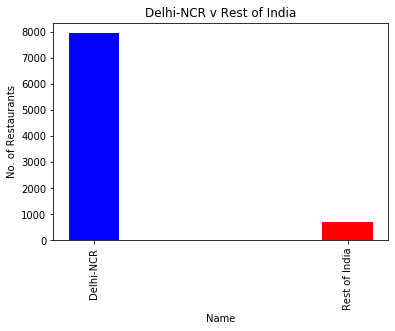

In [14]:
##1.1 Plot the bar graph of number of restaurants present in Delhi NCR vs Rest of India.
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
df_start=pd.read_csv(r'C:\Users\nikhi\OneDrive\Desktop\zomato.csv',engine='python')
df_start['City'].dropna(inplace=True)
df_start = df_start[df_start['Country Code'] == 1]
df_start['City'].replace("New Delhi","Delhi-NCR",inplace=True)
df_start['City'].replace("Ghaziabad","Delhi-NCR",inplace=True) 
df_start['City'].replace("Noida","Delhi-NCR",inplace=True)
df_start['City'].replace("Gurgaon","Delhi-NCR",inplace=True) 
df_start['City'].replace("Faridabad","Delhi-NCR",inplace=True)
df_start1 = df_start[df_start['City'] != 'Delhi-NCR']
#print(df_start['Country Code'])
Delhi=df_start.groupby('City')['City'].count().sort_values(ascending=False)
k = ['Delhi-NCR','Rest of India']
l = []
India = df_start1.groupby('Country Code')['Country Code'].count().sort_values(ascending=False)
l.append(Delhi['Delhi-NCR'])
l.append(India[1])
print('Delhi-NCR',l[0])
print('Rest of India',l[1])
plt.bar(k,l,width = 0.2,color = ["blue","red"])
plt.xticks(rotation = 90)
plt.xlabel('Name') 
plt.ylabel('No. of Restaurants') 
plt.title('Delhi-NCR v Rest of India') 
plt.show()


In [2]:
##1.2 Find the cuisines which are not present in restaurant of Delhi NCR but present in rest of India.
##Check using Zomato API whether this cuisines are actually not served in restaurants of Delhi-NCR or just it due to incomplete dataset.
from collections import Counter 
import matplotlib.pyplot as plt
import numpy as np
import csv
import pandas as pd
import operator

df_start=pd.read_csv(r'C:\Users\nikhi\OneDrive\Desktop\zomato.csv',engine='python')
df_start['City'].dropna(inplace=True)
df_start = df_start[df_start['Country Code'] == 1]
df_start['City'].replace("New Delhi","Delhi-NCR",inplace=True)
df_start['City'].replace("Ghaziabad","Delhi-NCR",inplace=True) 
df_start['City'].replace("Noida","Delhi-NCR",inplace=True)
df_start['City'].replace("Gurgaon","Delhi-NCR",inplace=True) 
df_start['City'].replace("Faridabad","Delhi-NCR",inplace=True)
df_start2 = df_start[df_start['City'] == 'Delhi-NCR']

def sep_Cuisines(Cuisines):
    return [i.strip() for i in Cuisines.split(",")]

delhi = {}
rest_of_india = {}
df_start2["Cuisines"]= df_start2["Cuisines"].apply(sep_Cuisines)
for i in df_start2["Cuisines"]:
    for j in i:
        delhi[j] = 1
df_start3 = df_start[df_start['City'] != 'Delhi-NCR']
df_start3["Cuisines"]= df_start3["Cuisines"].apply(sep_Cuisines)
for i in df_start3["Cuisines"]:
    for j in i:
        rest_of_india[j] = 1
delhi1 = []
rest_of_india1 = []
for key in delhi.keys():
    delhi1.append(key)
for key in rest_of_india.keys():
    rest_of_india1.append(key)
#print(delhi1)
#print(rest_of_india1)
for i in rest_of_india1:
    if(i in delhi1):
        continue
    else:
        print(i)
print("\n\nBBQ is served")

German
Malwani
BBQ
Cajun


BBQ is served


C:\Users\nikhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\nikhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


C:\Users\nikhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\nikhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Delhi-NCR

North Indian
Chinese
Fast Food
Mughlai
Bakery
South Indian
Continental
Desserts
Street Food
Italian


Rest of India

North Indian
Chinese
Continental
Italian
Cafe
Fast Food
South Indian
Mughlai
Desserts
Mexican


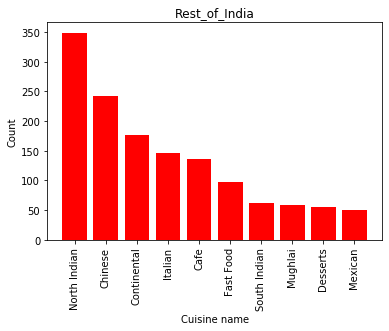

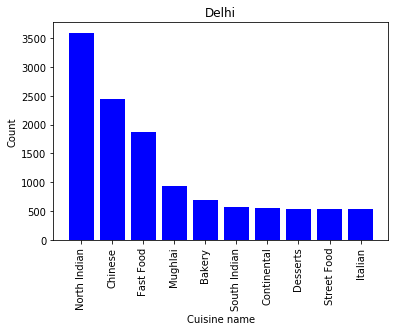

In [8]:
##1.3 Find the top 10 cuisines served by maximum number of restaurants in Delhi NCR and rest of India.
from collections import Counter 
import matplotlib.pyplot as plt
import numpy as np
import csv
import pandas as pd
import operator


df_start=pd.read_csv(r'C:\Users\nikhi\OneDrive\Desktop\zomato.csv',engine='python')
df_start['City'].dropna(inplace=True)
df_start = df_start[df_start['Country Code'] == 1]
df_start['City'].replace("New Delhi","Delhi-NCR",inplace=True)
df_start['City'].replace("Ghaziabad","Delhi-NCR",inplace=True) 
df_start['City'].replace("Noida","Delhi-NCR",inplace=True)
df_start['City'].replace("Gurgaon","Delhi-NCR",inplace=True) 
df_start['City'].replace("Faridabad","Delhi-NCR",inplace=True)
df_start2 = df_start[df_start['City'] == 'Delhi-NCR']

def sep_Cuisines(Cuisines):
    return [i.strip() for i in Cuisines.split(",")]

delhi = {}
rest_of_india = {}
df_start2["Cuisines"]= df_start2["Cuisines"].apply(sep_Cuisines)
for i in df_start2["Cuisines"]:
    for j in i:
        if(j in delhi):
            delhi[j] += 1
        else:
            delhi[j] = 1
df_start3 = df_start[df_start['City'] != 'Delhi-NCR']
df_start3["Cuisines"]= df_start3["Cuisines"].apply(sep_Cuisines)
for i in df_start3["Cuisines"]:
    for j in i:
        if(j in rest_of_india):
            rest_of_india[j] += 1
        else:
            rest_of_india[j] = 1

sorted_delhi = dict( sorted(delhi.items(), key=operator.itemgetter(1),reverse=True))
sorted_rest_of_india = dict( sorted(rest_of_india.items(), key=operator.itemgetter(1),reverse=True))
         
#print(sorted_delhi)
#print(sorted_rest_of_india)

#print(rest_of_india)
delhi1 = []
x1 = []
rest_of_india1 = []
x2 = []
count = 0
print('Delhi-NCR\n')
for key in sorted_delhi:
    if(count == 10):
        break
    count += 1
    print(key)
    delhi1.append(key)
    x1.append(sorted_delhi[key])

count = 0
print('\n\nRest of India\n')
for key in sorted_rest_of_india:
    if(count == 10):
        break
    count += 1
    print(key)
    rest_of_india1.append(key)
    x2.append(sorted_rest_of_india[key])
plt.bar(rest_of_india1,x2,width = 0.8,color = "Red")
plt.xticks(rotation = 90)
plt.xlabel('Cuisine name') 
plt.ylabel('Count') 
plt.title('Rest_of_India') 
plt.show()

plt.bar(delhi1,x1,width = 0.8,color = "Blue")
plt.xticks(rotation = 90)
plt.xlabel('Cuisine name') 
plt.ylabel('Count') 
plt.title('Delhi') 
plt.show()
#print(delhi1)
#print(rest_of_india1)

C:\Users\nikhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\nikhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


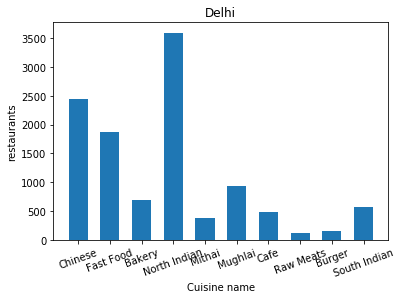

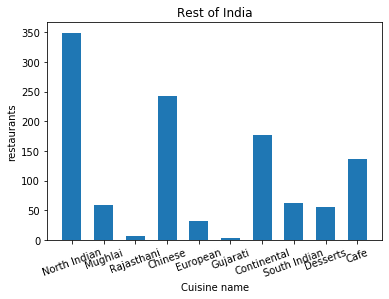

In [19]:
##1.4 Write a short detailed analysis of how cuisine served is different from Delhi NCR to Rest of India. 
##Plot the suitable graph to explain your inference.
from collections import Counter 
import matplotlib.pyplot as plt
import numpy as np
import csv
import pandas as pd
import operator


df_start=pd.read_csv(r'C:\Users\nikhi\OneDrive\Desktop\zomato.csv',engine='python')
df_start['City'].dropna(inplace=True)
df_start = df_start[df_start['Country Code'] == 1]
df_start['City'].replace("New Delhi","Delhi-NCR",inplace=True)
df_start['City'].replace("Ghaziabad","Delhi-NCR",inplace=True) 
df_start['City'].replace("Noida","Delhi-NCR",inplace=True)
df_start['City'].replace("Gurgaon","Delhi-NCR",inplace=True) 
df_start['City'].replace("Faridabad","Delhi-NCR",inplace=True)
df_start2 = df_start[df_start['City'] == 'Delhi-NCR']

def sep_Cuisines(Cuisines):
    return [i.strip() for i in Cuisines.split(",")]

delhi = {}
rest_of_india = {}
df_start2["Cuisines"]= df_start2["Cuisines"].apply(sep_Cuisines)
for i in df_start2["Cuisines"]:
    for j in i:
        if(j in delhi):
            delhi[j] += 1
        else:
            delhi[j] = 1
df_start3 = df_start[df_start['City'] != 'Delhi-NCR']
df_start3["Cuisines"]= df_start3["Cuisines"].apply(sep_Cuisines)
for i in df_start3["Cuisines"]:
    for j in i:
        if(j in rest_of_india):
            rest_of_india[j] += 1
        else:
            rest_of_india[j] = 1



x1 = []
x2 = []
y1 = []
y2 = []
count = 0
for i in delhi:
    if(count == 10):
        break
    count += 1
    x1.append(i)
    y1.append(delhi[i])
count = 0
for i in rest_of_india:
    if(count == 10):
        break
    count += 1
    x2.append(i)
    y2.append(rest_of_india[i])
plt.bar(x1,y1,width = 0.6)
plt.xticks(rotation = 20)
plt.xlabel('Cuisine name') 
plt.ylabel('restaurants') 
plt.title('Delhi') 
plt.show()
plt.bar(x2,y2,width = 0.6)
plt.xticks(rotation = 20)
plt.xlabel('Cuisine name') 
plt.ylabel('restaurants')
plt.title('Rest of India') 
plt.show()


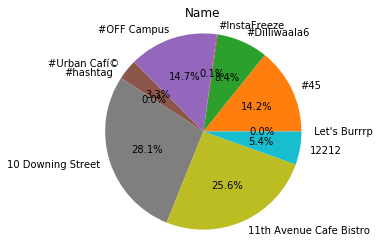

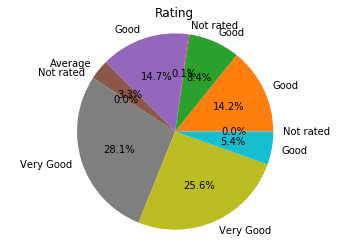

In [36]:
##2.1.1 Number of Votes given Restaurant
from collections import Counter 
import matplotlib.pyplot as plt
import numpy as np
import csv
import pandas as pd
import operator


df_start=pd.read_csv(r'C:\Users\nikhi\OneDrive\Desktop\zomato.csv',engine='python')
df_start['City'].dropna(inplace=True)
df_start = df_start[df_start['Country Code'] == 1]
df_start['City'].replace("New Delhi","Delhi-NCR",inplace=True)
df_start['City'].replace("Ghaziabad","Delhi-NCR",inplace=True) 
df_start['City'].replace("Noida","Delhi-NCR",inplace=True)
df_start['City'].replace("Gurgaon","Delhi-NCR",inplace=True) 
df_start['City'].replace("Faridabad","Delhi-NCR",inplace=True)
df_start2 = df_start[df_start['City'] == 'Delhi-NCR']

number=df_start.groupby(['Restaurant Name','Rating text'])['Votes'].max()[0:10]

Name=number.index 
Rate=number.values 
#print(Name,Rate)
a = []
b = []
c = []
for i in Name:
    a.append(i[0])
    b.append(i[1])
for i in Rate:
    c.append(i)
#print(a,b,c)
plt.pie(c,labels = a,autopct = '%1.1f%%')
plt.axis("equal")
plt.title('Name') 
plt.show()
plt.pie(c,labels = b,autopct = '%1.1f%%')
plt.axis("equal")
plt.title('Rating') 
plt.show()


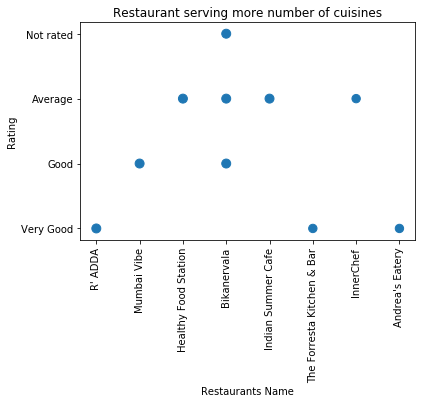

In [16]:
## 2.1.2 Restaurant serving more number of cuisines.
from collections import Counter 
import matplotlib.pyplot as plt
import numpy as np
import csv
import pandas as pd
import operator


df_start=pd.read_csv(r'C:\Users\nikhi\OneDrive\Desktop\zomato.csv',engine='python')
df_start['City'].dropna(inplace=True)
df_start = df_start[df_start['Country Code'] == 1]
df_start['City'].replace("New Delhi","Delhi-NCR",inplace=True)
df_start['City'].replace("Ghaziabad","Delhi-NCR",inplace=True) 
df_start['City'].replace("Noida","Delhi-NCR",inplace=True)
df_start['City'].replace("Gurgaon","Delhi-NCR",inplace=True) 
df_start['City'].replace("Faridabad","Delhi-NCR",inplace=True)
#df_start2 = df_start[df_start['City'] == 'Delhi-NCR']

def sep_Cuisines(Cuisines):
    a = [i.strip() for i in Cuisines.split(",")]
    return len(a)

df_start["Cuisines"]= df_start["Cuisines"].apply(sep_Cuisines)
number=df_start.groupby(['Restaurant Name','Rating text'])['Cuisines'].max().sort_values(ascending=False)[0:10]
Name=number.index 
Rate=number.values 
#print(Name,Rate)
a = []
b = []
c = []
for i in Name:
    a.append(i[0])
    b.append(i[1])
for i in Rate:
    c.append(i*10)
plt.scatter(a,b,s=c)
plt.xticks(rotation = 90)
plt.xlabel('Restaurants Name') 
plt.ylabel('Rating') 
plt.title('Restaurant serving more number of cuisines') 

plt.show()

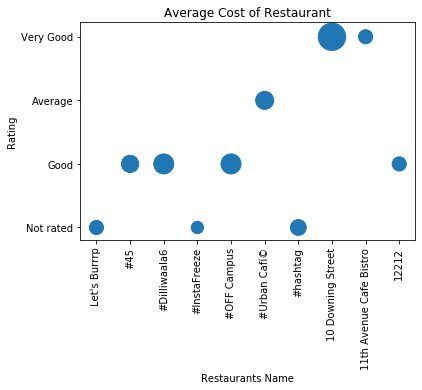

In [17]:
## 2.1.3 Average Cost of Restaurant
from collections import Counter 
import matplotlib.pyplot as plt
import numpy as np
import csv
import pandas as pd
import operator


df_start=pd.read_csv(r'C:\Users\nikhi\OneDrive\Desktop\zomato.csv',engine='python')
df_start['City'].dropna(inplace=True)
df_start = df_start[df_start['Country Code'] == 1]
df_start['City'].replace("New Delhi","Delhi-NCR",inplace=True)
df_start['City'].replace("Ghaziabad","Delhi-NCR",inplace=True) 
df_start['City'].replace("Noida","Delhi-NCR",inplace=True)
df_start['City'].replace("Gurgaon","Delhi-NCR",inplace=True) 
df_start['City'].replace("Faridabad","Delhi-NCR",inplace=True)
number=df_start.groupby(['Restaurant Name','Rating text'])['Average Cost for two'].max()[0:10]
Name=number.index 
Rate=number.values 
#print(Name,Rate)
a = []
b = []
c = []
for i in Name:
    a.append(i[0])
    b.append(i[1])
for i in Rate:
    c.append(i/2)
plt.scatter(a,b,s=c)
plt.xticks(rotation = 90)
plt.xlabel('Restaurants Name') 
plt.ylabel('Rating') 
plt.title('Average Cost of Restaurant') 
plt.show()

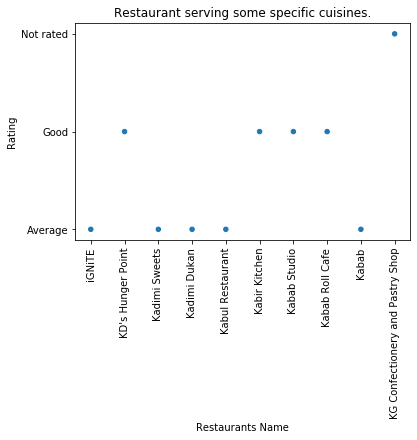

In [18]:
##2.1.4 Restaurant serving some specific cuisines.
from collections import Counter 
import matplotlib.pyplot as plt
import numpy as np
import csv
import pandas as pd
import operator


df_start=pd.read_csv(r'C:\Users\nikhi\OneDrive\Desktop\zomato.csv',engine='python')
df_start['City'].dropna(inplace=True)
df_start = df_start[df_start['Country Code'] == 1]
df_start['City'].replace("New Delhi","Delhi-NCR",inplace=True)
df_start['City'].replace("Ghaziabad","Delhi-NCR",inplace=True) 
df_start['City'].replace("Noida","Delhi-NCR",inplace=True)
df_start['City'].replace("Gurgaon","Delhi-NCR",inplace=True) 
df_start['City'].replace("Faridabad","Delhi-NCR",inplace=True)
#df_start2 = df_start[df_start['City'] == 'Delhi-NCR']
df_start['Cuisines'].dropna(inplace=True)

def sep_Cuisines(Cuisines):
    a = [i.strip() for i in Cuisines.split(",")]
    return len(a)

df_start["Cuisines"]= df_start["Cuisines"].apply(sep_Cuisines)
#print(df_start["Cuisines"])
df_start = df_start[(df_start['Cuisines'] == 1)|(df_start['Cuisines'] == 2)]
number=df_start.groupby(['Restaurant Name','Rating text'])['Cuisines'].max().sort_values(ascending=False)[0:10]
Name=number.index 
Rate=number.values 
#print(Name,Rate)
a = []
b = []
c = []
for i in Name:
    a.append(i[0])
    b.append(i[1])
for i in Rate:
    c.append(i*10)
plt.scatter(a,b,s=c)
plt.xticks(rotation = 90)
plt.xlabel('Restaurants Name') 
plt.ylabel('Rating') 
plt.title('Restaurant serving some specific cuisines.') 
plt.show()

Hotel Clarks Amer, Malviya Nagar 900.00
Aminabad 900.00
Friends Colony 890.00
Powai 840.00
Kirlampudi Layout 820.00
Express Avenue Mall,  Royapettah 800.00
Deccan Gymkhana 800.00
Banjara Hills 720.00
Sector 5, Salt Lake 710.00
Riverside Mall, Gomti Nagar 700.00


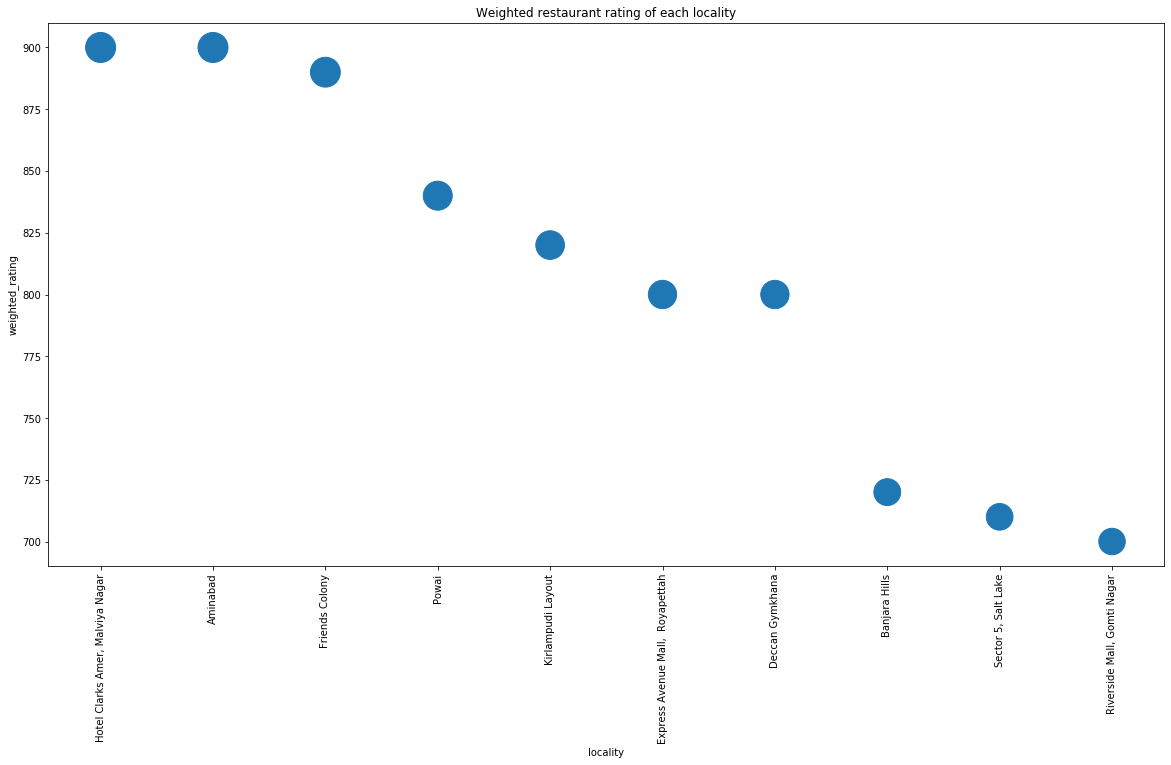

In [32]:
## 2.2.1 Weighted Restaurant Rating=Σ (number of votes * rating) / Σ (number of votes) .
from collections import Counter 
import matplotlib.pyplot as plt
import numpy as np
import csv
import pandas as pd
import operator


df_start=pd.read_csv(r'C:\Users\nikhi\OneDrive\Desktop\zomato.csv',engine='python')
df_start['City'].dropna(inplace=True)
df_start = df_start[df_start['Country Code'] == 1]
df_start['City'].replace("New Delhi","Delhi-NCR",inplace=True)
df_start['City'].replace("Ghaziabad","Delhi-NCR",inplace=True) 
df_start['City'].replace("Noida","Delhi-NCR",inplace=True)
df_start['City'].replace("Gurgaon","Delhi-NCR",inplace=True) 
df_start['City'].replace("Faridabad","Delhi-NCR",inplace=True)
Locality_dict = {}
 
Localities = np.array(df_start['Locality'])
ratings = np.array(df_start['Aggregate rating'])
votes = np.array(df_start['Votes'])
 
for i in range(len(Localities)):
    if votes[i]!=0:
        if Localities[i] not in Locality_dict:
            Locality_dict[Localities[i]] = [votes[i]*ratings[i],votes[i]]
        else:
            Locality_dict[Localities[i]][0] += votes[i]*ratings[i]
            Locality_dict[Localities[i]][1] += votes[i]
            
 
 
         
ratings = []
for key,value in Locality_dict.items():
    Locality = key
    weighted_rating = round(value[0]/value[1],2)
    ratings.append([weighted_rating,key])
     
ratings.sort(reverse=True)
Localities1 = [ i[1] for i in ratings][0:10]
ratings1 = [ (i[0]-4)*1000 for i in ratings][0:10]

#print(Localities1)
#print(ratings1)
for i in range(10):
    print(Localities1[i],"%.2f" %ratings1[i])
sizes = np.arange(10,0,1)
plt.rcParams['figure.figsize'] = (20,10)
plt.scatter(Localities1,ratings1,s=ratings1)
plt.xticks(rotation = 90)
plt.xlabel('locality') 
plt.ylabel('weighted_rating')
plt.title('Weighted restaurant rating of each locality') 
plt.show()

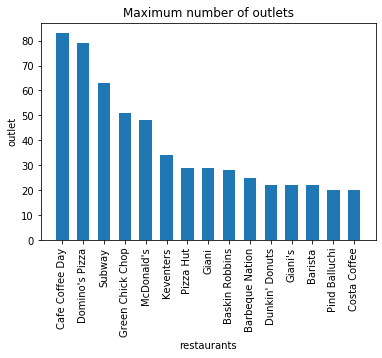

In [25]:
##3.1 Plot the bar graph top 15 restaurants have a maximum number of outlets.
from collections import Counter 
import matplotlib.pyplot as plt
import numpy as np
import csv
import pandas as pd
import operator


df_start=pd.read_csv(r'C:\Users\nikhi\OneDrive\Desktop\zomato.csv',engine='python')
df_start['City'].dropna(inplace=True)
df_start = df_start[df_start['Country Code'] == 1]
df_start['City'].replace("New Delhi","Delhi-NCR",inplace=True)
df_start['City'].replace("Ghaziabad","Delhi-NCR",inplace=True) 
df_start['City'].replace("Noida","Delhi-NCR",inplace=True)
df_start['City'].replace("Gurgaon","Delhi-NCR",inplace=True) 
df_start['City'].replace("Faridabad","Delhi-NCR",inplace=True)
#df_start2 = df_start[df_start['City'] == 'Delhi-NCR']
a = {}
for ind in df_start.index: 
    if(df_start['Restaurant Name'][ind] in a):
        a[df_start['Restaurant Name'][ind]] += 1
    else:
        a[df_start['Restaurant Name'][ind]] = 1
sorted_a = dict( sorted(a.items(), key=operator.itemgetter(1),reverse=True))
k = []
l = []
count = 0
for i in sorted_a:
    if(count == 15):
        break
    count += 1
    k.append(i)
    l.append(sorted_a[i])
plt.bar(k,l,width = 0.6)
plt.xticks(rotation = 90)
plt.xlabel('restaurants') 
plt.ylabel('outlet')
plt.title('Maximum number of outlets') 
plt.show()
    


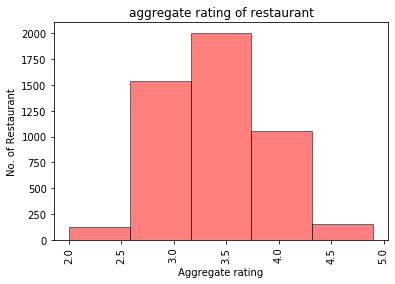

In [27]:
##3.2 Plot the histogram of aggregate rating of restaurant( drop the unrated restaurant).
from collections import Counter 
import matplotlib.pyplot as plt
import numpy as np
import csv
import pandas as pd
import operator


df_start=pd.read_csv(r'C:\Users\nikhi\OneDrive\Desktop\zomato.csv',engine='python')
df_start['City'].dropna(inplace=True)
df_start = df_start[df_start['Country Code'] == 1]
df_start['City'].replace("New Delhi","Delhi-NCR",inplace=True)
df_start['City'].replace("Ghaziabad","Delhi-NCR",inplace=True) 
df_start['City'].replace("Noida","Delhi-NCR",inplace=True)
df_start['City'].replace("Gurgaon","Delhi-NCR",inplace=True) 
df_start['City'].replace("Faridabad","Delhi-NCR",inplace=True)
#df_start2 = df_start[df_start['City'] == 'Delhi-NCR']
df_start["Rating text"].replace("Not rated", np.nan, inplace = True)
df_start.dropna(inplace=True, subset=["Rating text"])
number=df_start.groupby(['Restaurant Name'])['Aggregate rating'].max().sort_values(ascending=False)
Name=number.index 
Rate=number.values 
k = []
l = []
count = 0
for i in Rate:
    l.append(i)
for i in Name:
    k.append(i)
plt.hist(l,alpha = 0.5,bins = 5,edgecolor = 'black',color = "Red")
plt.xticks(rotation = 90)
plt.xlabel('Aggregate rating') 
plt.ylabel('No. of Restaurant')
plt.title('aggregate rating of restaurant') 
plt.show()
    


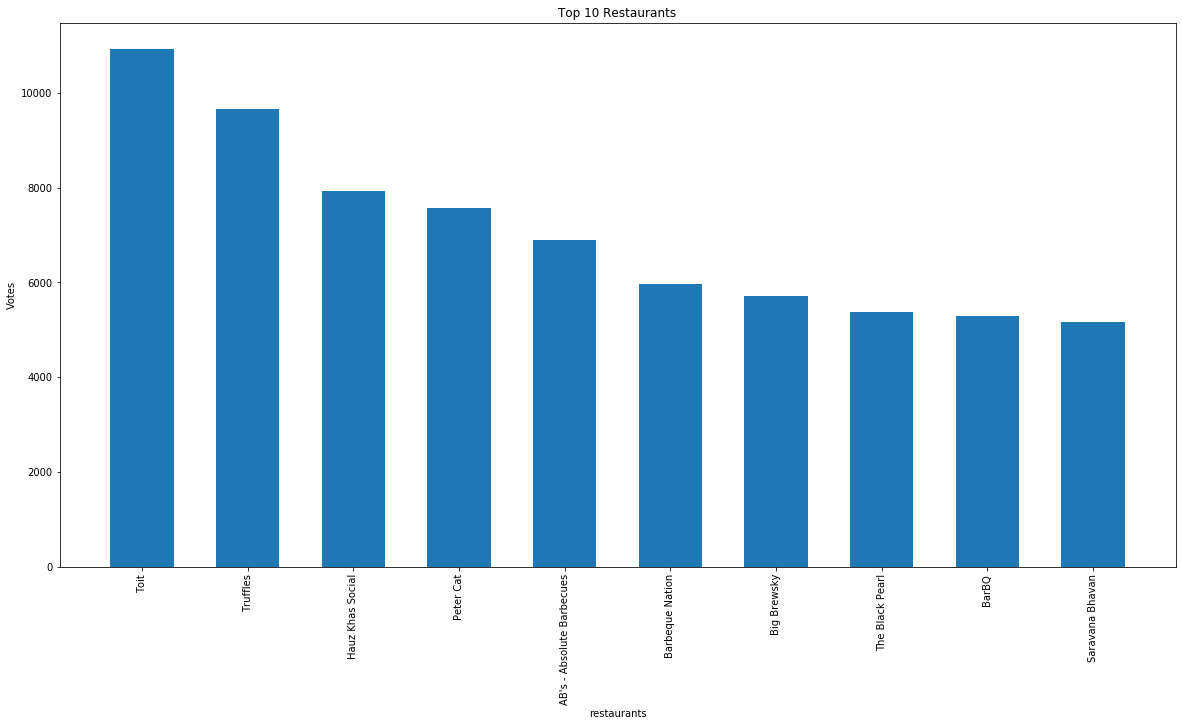

In [36]:
## 3.3 Plot the bar graph top 10 restaurants in the data with the highest number of votes.
from collections import Counter 
import matplotlib.pyplot as plt
import numpy as np
import csv
import pandas as pd
import operator


df_start=pd.read_csv(r'C:\Users\nikhi\OneDrive\Desktop\zomato.csv',engine='python')
df_start['City'].dropna(inplace=True)
df_start = df_start[df_start['Country Code'] == 1]
df_start['City'].replace("New Delhi","Delhi-NCR",inplace=True)
df_start['City'].replace("Ghaziabad","Delhi-NCR",inplace=True) 
df_start['City'].replace("Noida","Delhi-NCR",inplace=True)
df_start['City'].replace("Gurgaon","Delhi-NCR",inplace=True) 
df_start['City'].replace("Faridabad","Delhi-NCR",inplace=True)
#df_start2 = df_start[df_start['City'] == 'Delhi-NCR']
#df_start["Rating text"].replace("Not rated", np.nan, inplace = True)
#df_start.dropna(inplace=True, subset=["Rating text"])
number=df_start.groupby(['Restaurant Name'])['Votes'].max().sort_values(ascending=False)[0:10]
Name=number.index 
Rate=number.values 
#print(Name)
#print(Rate)
k = []
l = []
count = 0
for i in Rate:
    l.append(i)
for i in Name:
    k.append(i)
plt.bar(k,l,width = 0.6)
plt.xticks(rotation = 90)
plt.xlabel('restaurants') 
plt.ylabel('Votes')
plt.title('Top 10 Restaurants') 
plt.show()
    


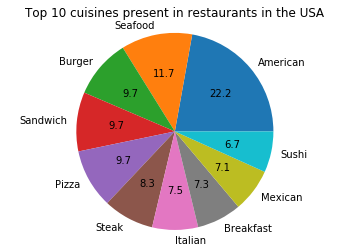

In [29]:
## 3.4 Plot the pie graph of top 10 cuisines present in restaurants in the USA.
from collections import Counter 
import matplotlib.pyplot as plt
import numpy as np
import csv
import pandas as pd
import operator


df_start=pd.read_csv(r'C:\Users\nikhi\OneDrive\Desktop\zomato.csv',engine='python')
df_start['City'].dropna(inplace=True)
df_start = df_start[df_start['Country Code'] == 216]
df_start['Cuisines'].dropna(inplace=True)
d = {}
def sep_Cuisines(Cuisines):
    a = [i.strip() for i in Cuisines.split(",")]
    for i in a:
        if(i in d):
            d[i] += 1
        else:
            d[i] = 1

df_start["Cuisines"]= df_start["Cuisines"].apply(sep_Cuisines)
sorted_d = dict( sorted(d.items(), key=operator.itemgetter(1),reverse=True))
a = []
b = []
count = 0
for i in sorted_d:
    if(count == 10):
        break
    count += 1
    a.append(i)
    b.append(sorted_d[i])
#print(a,b)
plt.pie(b,labels = a,autopct = "%.1f")
plt.axis("equal")
plt.title('Top 10 cuisines present in restaurants in the USA') 
plt.show()


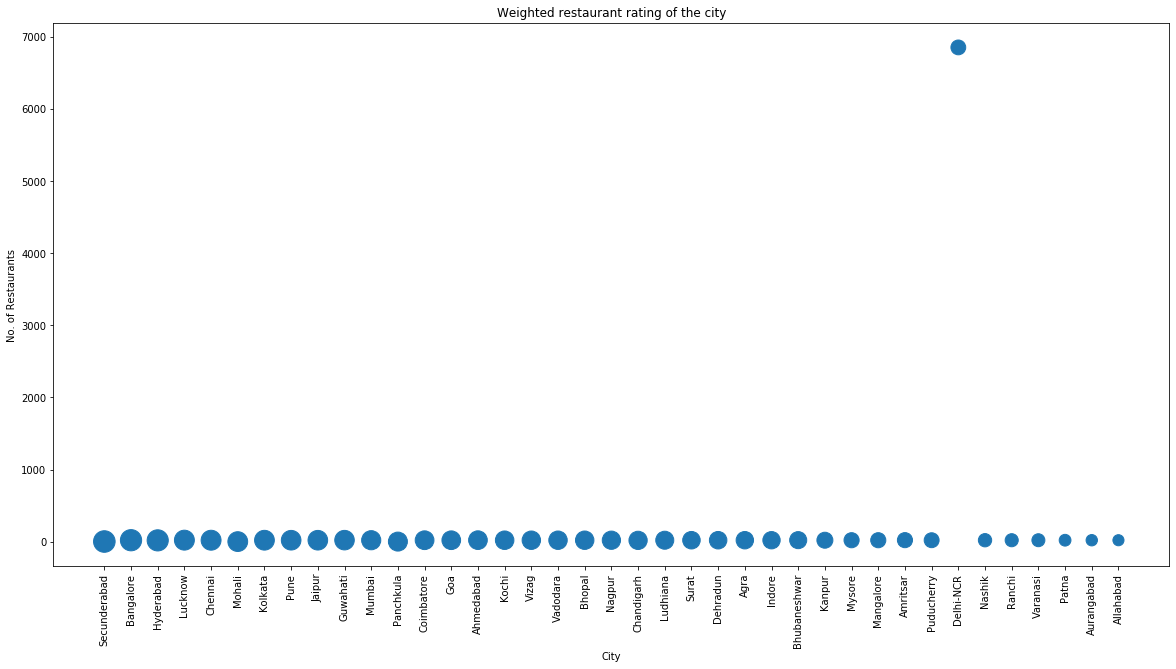

In [35]:
##3.5 Plot the bubble graph of a number of Restaurants present in the city of India and keeping 
##    the weighted restaurant rating of the city in a bubble.
from collections import Counter 
import matplotlib.pyplot as plt
import numpy as np
import csv
import pandas as pd
import operator


df_start=pd.read_csv(r'C:\Users\nikhi\OneDrive\Desktop\zomato.csv',engine='python')
df_start['City'].dropna(inplace=True)
df_start = df_start[df_start['Country Code'] == 1]
df_start['City'].replace("New Delhi","Delhi-NCR",inplace=True)
df_start['City'].replace("Ghaziabad","Delhi-NCR",inplace=True) 
df_start['City'].replace("Noida","Delhi-NCR",inplace=True)
df_start['City'].replace("Gurgaon","Delhi-NCR",inplace=True) 
df_start['City'].replace("Faridabad","Delhi-NCR",inplace=True)
city_dict = {}
 
cities = np.array(df_start['City'])
ratings = np.array(df_start['Aggregate rating'])
votes = np.array(df_start['Votes'])
 
for i in range(len(cities)):
    if votes[i]!=0:
        if cities[i] not in city_dict:
            city_dict[cities[i]] = [votes[i]*ratings[i],votes[i],1]
        else:
            city_dict[cities[i]][0] += votes[i]*ratings[i]
            city_dict[cities[i]][1] += votes[i]
            city_dict[cities[i]][2] +=1
 
 
         
city_ratings = []
for key,value in city_dict.items():
    city = key
    weighted_rating = round(value[0]/value[1],2)
    city_ratings.append([weighted_rating,key,value[2]])
     
city_ratings.sort(reverse=True)
cities = [ i[1] for i in city_ratings]
ratings = [ (i[0] - 3)*300 for i in city_ratings]
counts = [ i[2] for i in city_ratings]
sizes = np.arange(10,0,1)
plt.rcParams['figure.figsize'] = (20,10)
plt.scatter(cities,counts,s=ratings)
plt.xticks(rotation = 90)
plt.xlabel('City') 
plt.ylabel('No. of Restaurants')
plt.title('Weighted restaurant rating of the city')
plt.show()